<a href="https://colab.research.google.com/github/babupallam/Msc_AI_Module2_Natural_Language_Processing/blob/main/L06-Feed%20Forward%20Networks%20for%20Natural%20Language%20Processing/02_MLP_Basic_Architecture_and_Setup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. **Introduction**

- **Multilayer Perceptron (MLP)**:
  - MLP is one of the simplest neural networks. It's a type of **feedforward neural network** where data flows in one direction: from input to output.
  - MLP consists of layers:
    - **Input Layer**: Takes input features (e.g., pixels of an image, data points).
    - **Hidden Layer**: Processes the input and applies transformations using weights and activation functions.
    - **Output Layer**: Provides the final output, typically for classification or regression.
  
  - **Common Usage**:
    - **Classification** (e.g., identifying digits in images).
    - **Regression** (predicting continuous values like house prices).
  
  **Observation**:
  - MLPs are easy to understand and implement, making them an excellent starting point for deep learning.

  **Demonstration**:
  - Print a short introduction to MLPs and how they work using simple language:


In [93]:
print("An MLP is a feedforward neural network that consists of an input layer, hidden layer(s), and an output layer.")


An MLP is a feedforward neural network that consists of an input layer, hidden layer(s), and an output layer.


---


### 2. **Setting Up the Environment**

- **Using `InteractiveShell` for Multiple Outputs**:
  - In Jupyter notebooks, when multiple operations occur in a single cell, sometimes only the last output is shown.
  - By enabling `InteractiveShell.ast_node_interactivity = "all"`, we ensure that all operations produce outputs, which helps with debugging and visualization.

  **Demonstration**:
  - Run the following code to enable multiple outputs:


In [94]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"



- **Ensuring Reproducibility**:
  - **Reproducibility**: Ensuring the same results when running the code multiple times.
  - Random operations (e.g., generating random numbers, initializing neural network weights) can give different results on different runs.
  - **Setting a seed**: By fixing a seed value, we ensure that random operations generate the same results every time.

  **Observation**:
  - Without setting seeds, neural networks can behave differently each time you train them. This makes comparison difficult.

  **Demonstration**:
  - Set a random seed for CPU and GPU operations:


In [95]:
import torch  # Import the torch library, which is the main PyTorch package for building and training machine learning models

# The random seed is set to ensure that the operations involving randomness
# (like weight initialization in neural networks, random sampling, etc.)
# are reproducible. This is very important for debugging and testing.
seed = 1337  # Define the seed value; this can be any integer. 1337 is just a chosen example.

# Set the seed for generating random numbers on the CPU.
# This ensures that all the random number generation that happens on the CPU
# (for example, initializing weights of a model) will be deterministic.
torch.manual_seed(seed)

# If you are using GPU(s) with CUDA, this function will ensure that all random
# number generation on the GPU(s) is also deterministic, making your results
# reproducible across runs, even on GPUs.
torch.cuda.manual_seed_all(seed)

# This message is printed to indicate that the random seed has been set,
# confirming to the user that reproducibility is ensured.
print("Random seed set to ensure reproducibility.")


Random seed set to ensure reproducibility.


  - Compare outputs with and without setting the seed:


In [96]:
# Without seed
print("Without seed:")
print(torch.rand(2, 2))  # Generates a 2x2 tensor of random numbers without any seed.


Without seed:
tensor([[0.0783, 0.4956],
        [0.6231, 0.4224]])


In [97]:
# Without seed
print("Without seed:")
print(torch.rand(2, 2))  # Generates a 2x2 tensor of random numbers without any seed.


Without seed:
tensor([[0.2004, 0.0287],
        [0.5851, 0.6967]])


Above two results are different in each exicution

In [98]:
# With seed
torch.manual_seed(seed)  # Setting the seed to a fixed value
print("With seed:")
print(torch.rand(2, 2))  # Generates a 2x2 tensor of random numbers, but now with the seed set


With seed:
tensor([[0.0783, 0.4956],
        [0.6231, 0.4224]])


In [99]:
# With seed
torch.manual_seed(seed)  # Setting the seed to a fixed value
print("With seed:")
print(torch.rand(2, 2))  # Generates a 2x2 tensor of random numbers, but now with the seed set


With seed:
tensor([[0.0783, 0.4956],
        [0.6231, 0.4224]])


Above two results are same even after the second exicution

---



### 3. **Network Initialization**

- **Defining the MLP**:
  - An MLP consists of **fully connected (dense) layers** where each input is connected to every neuron in the next layer.
  - PyTorch provides the `nn.Module` class, which we use to define custom models.

  **Layers**:
  - **Input layer**: The input dimension is defined by the number of features in the data (e.g., if the input is a 3D vector, `input_dim = 3`).
  - **Hidden layer**: A hidden layer is a layer between input and output layers that applies transformations to the input data.
  - **Output layer**: Outputs the final prediction, typically the number of classes (for classification) or a single value (for regression).

  **Activation Function (ReLU)**:
  - **ReLU (Rectified Linear Unit)**: A common activation function that outputs the input if it’s positive, otherwise it outputs zero.
  - It introduces non-linearity, which helps the network learn complex patterns.
  


  **MLP Class Definition**:
  - Here’s how to define a basic MLP in PyTorch:


In [100]:
import torch.nn.functional as F  # Importing the functional module from PyTorch to access activation functions like ReLU
import torch.nn as nn  # Importing the torch.nn module to define neural network layers

# Define a class for a simple Multilayer Perceptron (MLP) neural network
class MultilayerPerceptron(nn.Module):  # Inherit from nn.Module to define a custom neural network
    def __init__(self, input_dim, hidden_dim, output_dim):
        # The __init__ method is the constructor that initializes the MLP's layers
        super(MultilayerPerceptron, self).__init__()  # Call the parent class's constructor to properly initialize nn.Module

        # Describe the architecture before building it
        print(f"Initializing Multilayer Perceptron with the following dimensions:\n"
              f"Input Layer Dimension: {input_dim}\n"
              f"Hidden Layer Dimension: {hidden_dim}\n"
              f"Output Layer Dimension: {output_dim}")

        # Defining layers in the network
        self.fc1 = nn.Linear(input_dim, hidden_dim)  # First fully connected (dense) layer: transforms input_dim -> hidden_dim
        print(f"Layer 1: Fully Connected (Linear) Layer mapping {input_dim} -> {hidden_dim}")

        self.fc2 = nn.Linear(hidden_dim, output_dim)  # Second fully connected layer: transforms hidden_dim -> output_dim
        print(f"Layer 2: Fully Connected (Linear) Layer mapping {hidden_dim} -> {output_dim}")

        # Summarize the network architecture after initialization
        print("\nMultilayer Perceptron Initialized Successfully.")

    def forward(self, x):
        # The forward method defines how data flows through the network

        # Describe the input shape before passing through the network
        print(f"\nForward Pass - Input Tensor Shape: {x.shape}")

        # Passing the input through the first fully connected layer and applying ReLU activation
        x = F.relu(self.fc1(x))  # Apply ReLU activation to introduce non-linearity
        print(f"After Layer 1 (with ReLU activation) - Tensor Shape: {x.shape}")

        # Passing the data through the second fully connected layer (final output)
        x = self.fc2(x)  # No activation applied here, as it's the final output layer
        print(f"After Layer 2 (Output Layer) - Tensor Shape: {x.shape}\n")

        return x


In [101]:

# Example usage to demonstrate the architecture
# Creating a sample MLP with input dimension 10, hidden dimension 5, and output dimension 2
model = MultilayerPerceptron(input_dim=10, hidden_dim=5, output_dim=2)

# Create a random input tensor with size (batch_size=1, input_dim=10) for testing the forward pass
sample_input = torch.randn(1, 10)

# Forward pass with sample input to visualize the flow of data through the network
output = model.forward(sample_input)

# Print the output tensor
print(f"Final Output: {output}")


Initializing Multilayer Perceptron with the following dimensions:
Input Layer Dimension: 10
Hidden Layer Dimension: 5
Output Layer Dimension: 2
Layer 1: Fully Connected (Linear) Layer mapping 10 -> 5
Layer 2: Fully Connected (Linear) Layer mapping 5 -> 2

Multilayer Perceptron Initialized Successfully.

Forward Pass - Input Tensor Shape: torch.Size([1, 10])
After Layer 1 (with ReLU activation) - Tensor Shape: torch.Size([1, 5])
After Layer 2 (Output Layer) - Tensor Shape: torch.Size([1, 2])

Final Output: tensor([[-0.0720, -0.2881]], grad_fn=<AddmmBackward0>)



  **Observation**:
  - Using ReLU ensures that only positive values are passed through, which helps prevent problems like vanishing gradients.

  **Demonstration**:
  - Instantiate and print the model:


In [102]:
input_dim = 3  # Number of features or dimensions in the input data
hidden_dim = 100  # Number of neurons in the hidden layer
output_dim = 4  # Number of output classes or predictions
mlp = MultilayerPerceptron(input_dim, hidden_dim, output_dim)  # Instantiate the MLP model with defined dimensions
print(mlp)  # Print the structure of the MLP model


Initializing Multilayer Perceptron with the following dimensions:
Input Layer Dimension: 3
Hidden Layer Dimension: 100
Output Layer Dimension: 4
Layer 1: Fully Connected (Linear) Layer mapping 3 -> 100
Layer 2: Fully Connected (Linear) Layer mapping 100 -> 4

Multilayer Perceptron Initialized Successfully.
MultilayerPerceptron(
  (fc1): Linear(in_features=3, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=4, bias=True)
)



  - Pass a random input through the network and print the output:


In [103]:
x_input = torch.rand(2, input_dim)  # Create a random input tensor with shape (2, input_dim)
output = mlp(x_input)  # Pass the input through the MLP model to get the output
print("Model output:", output)  # Print the output of the model



Forward Pass - Input Tensor Shape: torch.Size([2, 3])
After Layer 1 (with ReLU activation) - Tensor Shape: torch.Size([2, 100])
After Layer 2 (Output Layer) - Tensor Shape: torch.Size([2, 4])

Model output: tensor([[-0.3270,  0.2411,  0.1128,  0.0767],
        [-0.1136,  0.1826, -0.0087,  0.0026]], grad_fn=<AddmmBackward0>)


---



### 4. **Exercise: Modify the Hidden Units**



- **Changing the Hidden Layer Size**:
  - The number of hidden units (neurons in the hidden layer) determines how much the model can learn.
  - More hidden units allow the model to capture more complex patterns, but too many may lead to overfitting.

  **Task**:
  - Change the number of hidden units (e.g., from 100 to 50, 200, etc.) and observe how the model structure changes.
  
  **Demonstration**:
  - Modify the hidden dimension and observe the number of parameters:


In [104]:
hidden_dim = 50  # Modify the number of neurons in the hidden layer
mlp = MultilayerPerceptron(input_dim, hidden_dim, output_dim)  # Re-instantiate the MLP model with the updated hidden_dim
print(f"Model with {hidden_dim} hidden units:", mlp)  # Print the new model architecture


Initializing Multilayer Perceptron with the following dimensions:
Input Layer Dimension: 3
Hidden Layer Dimension: 50
Output Layer Dimension: 4
Layer 1: Fully Connected (Linear) Layer mapping 3 -> 50
Layer 2: Fully Connected (Linear) Layer mapping 50 -> 4

Multilayer Perceptron Initialized Successfully.
Model with 50 hidden units: MultilayerPerceptron(
  (fc1): Linear(in_features=3, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=4, bias=True)
)



- **Observation**:
  - Fewer hidden units mean fewer learnable parameters, which may reduce the model’s capacity to learn complex data patterns.

  - Check the total number of parameters in the model:


In [105]:
def count_parameters(model):
    # This function sums the number of parameters in the model that require gradients
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print("Total parameters:", count_parameters(mlp))  # Print the total number of trainable parameters in the model


Total parameters: 404


---



### 5. **Conclusion**

- **Recap**:
  - MLPs are simple yet powerful neural networks, consisting of input, hidden, and output layers.
  - ReLU helps introduce non-linearity, making the model capable of learning more complex patterns.
  - Setting a random seed ensures reproducibility, an important aspect when comparing models.



- **Extending the MLP**:
  - To extend this basic MLP for more complex tasks, you can add more hidden layers, use regularization techniques like **dropout**, or even include **batch normalization** to stabilize learning.

  **Demonstration**:
  - Add more layers to make the MLP deeper:
    ```python
    class DeepMLP(nn.Module):
        def __init__(self, input_dim, hidden_dim, output_dim):
            super(DeepMLP, self).__init__()
            self.fc1 = nn.Linear(input_dim, hidden_dim)
            self.fc2 = nn.Linear(hidden_dim, hidden_dim)
            self.fc3 = nn.Linear(hidden_dim, output_dim)

        def forward(self, x):
            x = F.relu(self.fc1(x))
            x = F.relu(self.fc2(x))
            return self.fc3(x)

    deep_mlp = DeepMLP(input_dim, hidden_dim, output_dim)
    print("Deep MLP with two hidden layers:", deep_mlp)
    ```


### Observation 1

In [106]:
import torch
import torch.nn.functional as F  # Importing the functional module from PyTorch to access activation functions like ReLU
import torch.nn as nn  # Importing the torch.nn module to define neural network layers

# Define a class for a simple Multilayer Perceptron (MLP) neural network
class MultilayerPerceptron(nn.Module):  # Inherit from nn.Module to define a custom neural network
    def __init__(self, input_dim, hidden_dim, output_dim):
        # The __init__ method is the constructor that initializes the MLP's layers
        super(MultilayerPerceptron, self).__init__()  # Call the parent class's constructor to properly initialize nn.Module

        # Describe the architecture before building it
        print(f"Initializing Multilayer Perceptron with the following dimensions:\n"
              f"Input Layer Dimension: {input_dim}\n"
              f"Hidden Layer Dimension: {hidden_dim}\n"
              f"Output Layer Dimension: {output_dim}")

        # Defining layers in the network
        self.fc1 = nn.Linear(input_dim, hidden_dim)  # First fully connected (dense) layer: transforms input_dim -> hidden_dim
        print(f"Layer 1: Fully Connected (Linear) Layer mapping {input_dim} -> {hidden_dim}")

        self.fc2 = nn.Linear(hidden_dim, output_dim)  # Second fully connected layer: transforms hidden_dim -> output_dim
        print(f"Layer 2: Fully Connected (Linear) Layer mapping {hidden_dim} -> {output_dim}")

        # Summarize the network architecture after initialization
        print("\nMultilayer Perceptron Initialized Successfully.")

    def forward(self, x):
        # The forward method defines how data flows through the network

        # Describe the input shape before passing through the network
        print(f"\nForward Pass - Input Tensor Shape: {x.shape}")

        # Passing the input through the first fully connected layer and applying ReLU activation
        x = F.relu(self.fc1(x))  # Apply ReLU activation to introduce non-linearity
        print(f"After Layer 1 (with ReLU activation) - Tensor Shape: {x.shape}")

        # Passing the data through the second fully connected layer (final output)
        x = self.fc2(x)  # No activation applied here, as it's the final output layer
        print(f"After Layer 2 (Output Layer) - Tensor Shape: {x.shape}\n")

        return x

    def describe_model_architecture(self):
        # Additional method to describe more details about the architecture
        print("\n==== Model Architecture Description ====")
        print(f"First Layer:\n\tFully Connected Layer with {self.fc1.in_features} input features "
              f"and {self.fc1.out_features} output features.")
        print("This layer transforms the input data and introduces non-linearity using the ReLU activation function.")

        print(f"Second Layer:\n\tFully Connected Layer with {self.fc2.in_features} input features "
              f"and {self.fc2.out_features} output features.")
        print("This layer produces the final output without any activation function.")
        print("========================================\n")



In [107]:
# Example usage to demonstrate the architecture and features
# Creating a sample MLP with input dimension 10, hidden dimension 5, and output dimension 2
model = MultilayerPerceptron(input_dim=10, hidden_dim=5, output_dim=2)

# Call the method to describe the model architecture
model.describe_model_architecture()

# Create a random input tensor with size (batch_size=1, input_dim=10) for testing the forward pass
sample_input = torch.randn(1, 10)

# Forward pass with sample input to visualize the flow of data through the network
output = model.forward(sample_input)



Initializing Multilayer Perceptron with the following dimensions:
Input Layer Dimension: 10
Hidden Layer Dimension: 5
Output Layer Dimension: 2
Layer 1: Fully Connected (Linear) Layer mapping 10 -> 5
Layer 2: Fully Connected (Linear) Layer mapping 5 -> 2

Multilayer Perceptron Initialized Successfully.

==== Model Architecture Description ====
First Layer:
	Fully Connected Layer with 10 input features and 5 output features.
This layer transforms the input data and introduces non-linearity using the ReLU activation function.
Second Layer:
	Fully Connected Layer with 5 input features and 2 output features.
This layer produces the final output without any activation function.


Forward Pass - Input Tensor Shape: torch.Size([1, 10])
After Layer 1 (with ReLU activation) - Tensor Shape: torch.Size([1, 5])
After Layer 2 (Output Layer) - Tensor Shape: torch.Size([1, 2])



In [108]:
# Print the output tensor
print(f"Final Output: {output}\n")

# Observing Layer Weights and Biases
print("\n==== Layer Weights and Biases Observation ====")
print(f"Layer 1 Weights:\n{model.fc1.weight}")
print(f"Layer 1 Biases:\n{model.fc1.bias}")
print(f"Layer 2 Weights:\n{model.fc2.weight}")
print(f"Layer 2 Biases:\n{model.fc2.bias}")
print("================================================")



Final Output: tensor([[-0.3280, -0.2255]], grad_fn=<AddmmBackward0>)


==== Layer Weights and Biases Observation ====
Layer 1 Weights:
Parameter containing:
tensor([[ 0.0930,  0.2063, -0.1490,  0.0078, -0.0095,  0.0277, -0.0648, -0.2445,
          0.1920, -0.1912],
        [-0.1206, -0.1298, -0.2388, -0.2586,  0.1917,  0.0941,  0.3041,  0.1580,
          0.1951,  0.1425],
        [ 0.2506, -0.1415, -0.0209, -0.2638, -0.2656, -0.2213, -0.1848,  0.1752,
         -0.1529,  0.0462],
        [-0.1248, -0.0715, -0.0339, -0.2682,  0.1187,  0.1203,  0.2282, -0.2464,
         -0.2410, -0.0806],
        [-0.0673, -0.1198,  0.2361, -0.1444,  0.0330, -0.0675,  0.2106, -0.0703,
         -0.1544, -0.0332]], requires_grad=True)
Layer 1 Biases:
Parameter containing:
tensor([-0.0113, -0.0177,  0.1917, -0.0284,  0.0644], requires_grad=True)
Layer 2 Weights:
Parameter containing:
tensor([[ 0.2292,  0.4019,  0.3817,  0.0501, -0.0978],
        [ 0.3812,  0.0150,  0.3503, -0.0838, -0.1793]], requires_grad=T

In [109]:
# Demonstration of input-output relation by feeding multiple inputs
batch_input = torch.randn(5, 10)  # Simulating a batch of 5 input samples
print("\nForward Pass with Batch of Inputs")
print(f"Input Shape (Batch of 5 samples): {batch_input.shape}")

# Pass batch through the network
batch_output = model.forward(batch_input)
print(f"Output Shape after Forward Pass: {batch_output.shape}\n")




Forward Pass with Batch of Inputs
Input Shape (Batch of 5 samples): torch.Size([5, 10])

Forward Pass - Input Tensor Shape: torch.Size([5, 10])
After Layer 1 (with ReLU activation) - Tensor Shape: torch.Size([5, 5])
After Layer 2 (Output Layer) - Tensor Shape: torch.Size([5, 2])

Output Shape after Forward Pass: torch.Size([5, 2])



In [110]:
# Plotting Weight Distributions for Deeper Understanding (Visualization)
import matplotlib.pyplot as plt

def plot_weights(layer, layer_name):
    # Plot the weights of the given layer
    plt.hist(layer.weight.detach().numpy().flatten(), bins=20, alpha=0.7)
    plt.title(f"Weight Distribution in {layer_name}")
    plt.xlabel("Weight values")
    plt.ylabel("Frequency")
    plt.show()



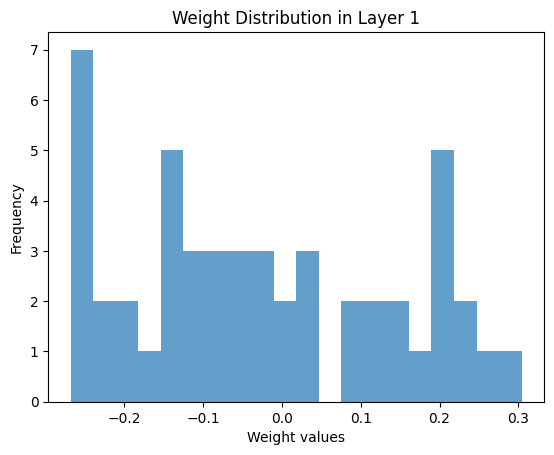

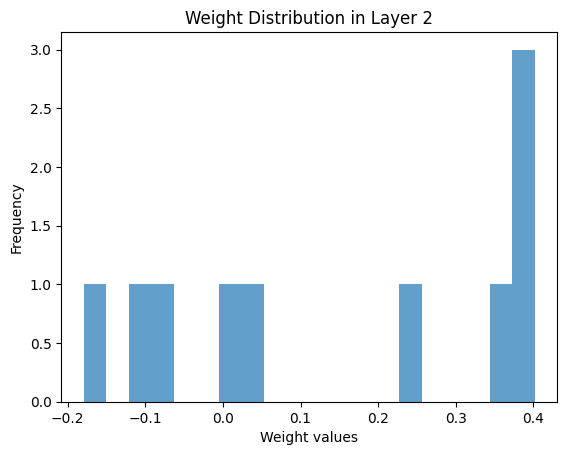


Forward Pass with Scaled Input
Scaled Input:
tensor([[-218.9364,  -60.2151, -186.5686,   65.3249,   42.2429,  -61.8102,
          247.9217,  -87.7147, -162.1529,    7.9995]])

Forward Pass - Input Tensor Shape: torch.Size([1, 10])
After Layer 1 (with ReLU activation) - Tensor Shape: torch.Size([1, 5])
After Layer 2 (Output Layer) - Tensor Shape: torch.Size([1, 2])

Output for Scaled Input: tensor([[ 39.0607, -20.3125]], grad_fn=<AddmmBackward0>)



In [111]:
# Visualize weight distribution for both layers
plot_weights(model.fc1, "Layer 1")
plot_weights(model.fc2, "Layer 2")

# Analyzing the effect of input scaling
scaled_input = torch.randn(1, 10) * 100  # Creating a scaled-up version of the input
print("\nForward Pass with Scaled Input")
print(f"Scaled Input:\n{scaled_input}")

# Pass scaled input through the network
scaled_output = model.forward(scaled_input)
print(f"Output for Scaled Input: {scaled_output}\n")




### 1. **Observation: Input Size Affects Layer Initialization**
   - The number of input features directly influences the size of the weight matrix in the first layer.
   - **Demonstration**:


In [112]:
input_dim = 3  # Number of input features (dimensionality of input)
mlp = nn.Linear(input_dim, 5)  # Initialize a linear layer that maps input_dim (3) to output_dim (5)

# Display details about the weight matrix
print("Weight matrix:")
print(mlp.weight)  # Displays the actual weight values of the linear layer
print("Shape of weight matrix:")
print(mlp.weight.shape)  # Displays the shape of the weight matrix, should be (5, 3)

# Display details about the bias term
print("Bias term:")
print(mlp.bias)  # Displays the bias values of the linear layer
print("Shape of bias term:")
print(mlp.bias.shape)  # Displays the shape of the bias term, should be (5,)


Weight matrix:
Parameter containing:
tensor([[ 0.2785, -0.2316, -0.5017],
        [-0.1514, -0.0117,  0.4708],
        [-0.4189, -0.5601, -0.4171],
        [-0.1606, -0.3289, -0.0321],
        [ 0.2608, -0.3033, -0.3102]], requires_grad=True)
Shape of weight matrix:
torch.Size([5, 3])
Bias term:
Parameter containing:
tensor([-0.0169,  0.1065,  0.2748, -0.3411,  0.3643], requires_grad=True)
Shape of bias term:
torch.Size([5])


   - **Explanation**: The weight matrix has a shape of `(output_dim, input_dim)`, where each row corresponds to weights for one output neuron, and each column corresponds to an input feature.

---



### Weight Matrix:
- **Dimensions Explanation**:
  The weight matrix in a fully connected linear layer connects each input feature to every output feature. Therefore, its shape must be `(output_dim, input_dim)`.

  In your example:
  - The **input_dim** is `3`, meaning there are 3 input features (or neurons).
  - The **output_dim** is `5`, meaning the layer produces 5 output values (or neurons).
  
  To compute each output, the model needs a weight for every input feature for each of the 5 output neurons. This results in a **weight matrix** of shape `(5, 3)`:
  - 5 rows (one for each output neuron).
  - 3 columns (one for each input feature).

  Mathematically, each row of the weight matrix corresponds to the weights applied to a specific output neuron, and each column corresponds to a specific input feature. During the forward pass, the input is multiplied by this weight matrix to generate the outputs.

  Example for a layer with 3 inputs and 5 outputs:
  ```plaintext
  Weight matrix:
  [
    [w11, w12, w13],  # Weights connecting input 1, 2, 3 to output 1
    [w21, w22, w23],  # Weights connecting input 1, 2, 3 to output 2
    [w31, w32, w33],  # Weights connecting input 1, 2, 3 to output 3
    [w41, w42, w43],  # Weights connecting input 1, 2, 3 to output 4
    [w51, w52, w53]   # Weights connecting input 1, 2, 3 to output 5
  ]
  ```

### Bias Term:
- **Dimensions Explanation**:
  Each output neuron in the layer also has an associated bias value. The bias is added to the result of the weighted sum of inputs for each output neuron.
  
  Since there are `5` output neurons, you need a bias term for each of them, leading to a **bias vector** of shape `(5,)`. This means:
  - 1 bias value is added to the weighted sum of inputs for each of the 5 output neurons.


Neurons in each layer:



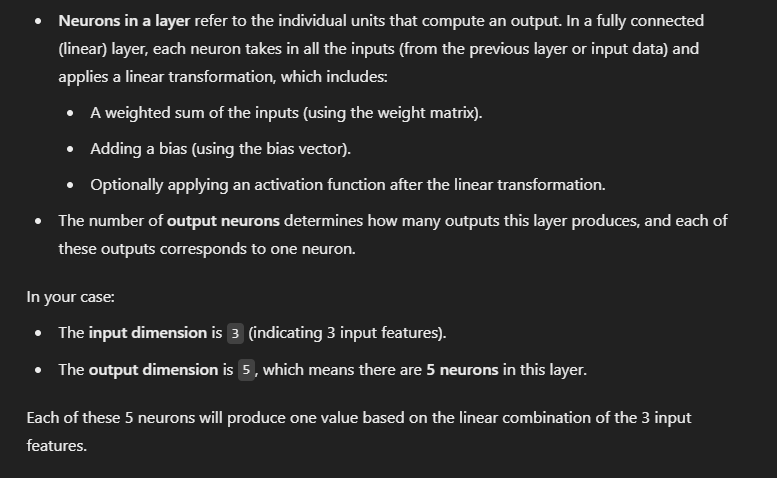


### 2. **Observation: ReLU Avoids Vanishing Gradients**
   - The ReLU activation function is widely used to prevent vanishing gradient problems and helps improve gradient flow in deep networks.
   - **Demonstration**:


In [113]:
x = torch.tensor([-1.0, 0.0, 1.0, 2.0])  # Define a 1D tensor with 4 values (including negative and positive)
relu_output = F.relu(x)  # Apply the ReLU activation function element-wise
print("ReLU applied on input:", relu_output)  # Print the result after applying ReLU
# ReLU outputs the input directly if it’s positive; otherwise, it outputs zero. This helps avoid issues where gradients shrink and stop the network from learning, which is common in activations like sigmoid and tanh.

ReLU applied on input: tensor([0., 0., 1., 2.])


ReLU Activation (F.relu(x)):
  - ReLU (Rectified Linear Unit) is a simple activation function that works as follows:
    - If the input is positive or zero, ReLU returns the input as is (i.e., f(x) = x).
    - If the input is negative, ReLU returns 0 (i.e., f(x) = 0).

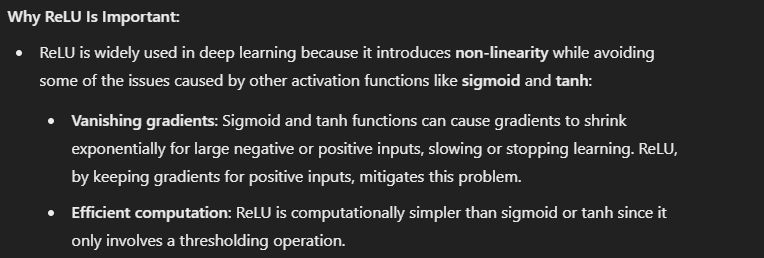

---

### 3. **Observation: Hidden Layer Size Increases Model Capacity**
   - The size of the hidden layer determines the model’s capacity to learn patterns from data. Larger hidden layers can model more complex relationships.
   - **Demonstration**:


In [114]:
mlp = MultilayerPerceptron(input_dim=3, hidden_dim=50, output_dim=4)
print("MLP structure:", mlp)


#The number of neurons in the hidden layer controls how many patterns the model can capture. More hidden units mean the model has more representational power but may also overfit on small datasets.


Initializing Multilayer Perceptron with the following dimensions:
Input Layer Dimension: 3
Hidden Layer Dimension: 50
Output Layer Dimension: 4
Layer 1: Fully Connected (Linear) Layer mapping 3 -> 50
Layer 2: Fully Connected (Linear) Layer mapping 50 -> 4

Multilayer Perceptron Initialized Successfully.
MLP structure: MultilayerPerceptron(
  (fc1): Linear(in_features=3, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=4, bias=True)
)



---

### 4. **Observation: Forward Pass Processes Input Through the Network**
   - During the forward pass, input data flows through each layer, where weights and activations are applied to produce the final output.
   - **Demonstration**:


In [115]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define the Multilayer Perceptron class
class MultilayerPerceptronMoreDetailed(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MultilayerPerceptronMoreDetailed, self).__init__()
        # Define the layers with their dimensions
        self.fc1 = nn.Linear(input_dim, hidden_dim)  # First fully connected layer (input -> hidden)
        self.fc2 = nn.Linear(hidden_dim, output_dim)  # Second fully connected layer (hidden -> output)

    def forward(self, x):
        # Print the input tensor details
        print("Input to the network (x):")
        print(f" - Shape: {x.shape} (batch_size={x.shape[0]}, input_dim={x.shape[1]})")
        print(f" - Values:\n{x}")

        # First layer: Linear transformation (input -> hidden layer)
        print("\nFirst Layer (fc1):")
        print(f" - Number of input neurons: {self.fc1.in_features} (input_dim)")
        print(f" - Number of output neurons: {self.fc1.out_features} (hidden_dim)")
        print(" - Weight matrix shape:", self.fc1.weight.shape)
        print(f" - Weight matrix values:\n{self.fc1.weight}")
        print(" - Bias shape:", self.fc1.bias.shape)
        print(f" - Bias values:\n{self.fc1.bias}")

        # Apply the first linear transformation
        x = self.fc1(x)
        print("\nOutput after Linear Transformation (fc1):")
        print(f" - Shape: {x.shape} (batch_size={x.shape[0]}, hidden_dim={self.fc1.out_features})")
        print(f" - Values:\n{x}")

        # Apply ReLU activation after the first layer
        x = F.relu(x)
        print("\nOutput after ReLU Activation (fc1):")
        print(f" - Shape: {x.shape} (batch_size={x.shape[0]}, hidden_dim={self.fc1.out_features})")
        print(f" - Values:\n{x}")

        # Second layer: Linear transformation (hidden -> output layer)
        print("\nSecond Layer (fc2):")
        print(f" - Number of input neurons: {self.fc2.in_features} (hidden_dim)")
        print(f" - Number of output neurons: {self.fc2.out_features} (output_dim)")
        print(" - Weight matrix shape:", self.fc2.weight.shape)
        print(f" - Weight matrix values:\n{self.fc2.weight}")
        print(" - Bias shape:", self.fc2.bias.shape)
        print(f" - Bias values:\n{self.fc2.bias}")

        # Apply the second linear transformation
        x = self.fc2(x)
        print("\nOutput after Linear Transformation (fc2):")
        print(f" - Shape: {x.shape} (batch_size={x.shape[0]}, output_dim={self.fc2.out_features})")
        print(f" - Values:\n{x}")

        return x



In [116]:
# Define model dimensions
input_dim = 3  # Number of input features (input dimension)
hidden_dim = 5  # Number of neurons in the hidden layer
output_dim = 2  # Number of output neurons (output dimension)

# Instantiate the model
mlpMoreDetailed = MultilayerPerceptronMoreDetailed(input_dim, hidden_dim, output_dim)

# Create a random input tensor
x_input = torch.rand(2, input_dim)  # Batch of 2 samples, each with 3 features (input_dim = 3)
print("\nRandom input tensor (x_input):")
print(f" - Shape: {x_input.shape} (batch_size={x_input.shape[0]}, input_dim={x_input.shape[1]})")
print(f" - Values:\n{x_input}")

# Perform the forward pass
output = mlpMoreDetailed(x_input)  # Pass the input through the model
print("\nFinal Model Output:")
print(f" - Shape: {output.shape} (batch_size={output.shape[0]}, output_dim={output.shape[1]})")
print(f" - Values:\n{output}")



Random input tensor (x_input):
 - Shape: torch.Size([2, 3]) (batch_size=2, input_dim=3)
 - Values:
tensor([[0.0847, 0.4053, 0.8108],
        [0.0601, 0.0327, 0.2494]])
Input to the network (x):
 - Shape: torch.Size([2, 3]) (batch_size=2, input_dim=3)
 - Values:
tensor([[0.0847, 0.4053, 0.8108],
        [0.0601, 0.0327, 0.2494]])

First Layer (fc1):
 - Number of input neurons: 3 (input_dim)
 - Number of output neurons: 5 (hidden_dim)
 - Weight matrix shape: torch.Size([5, 3])
 - Weight matrix values:
Parameter containing:
tensor([[-0.2705, -0.2056, -0.1716],
        [-0.0891,  0.2956,  0.4689],
        [-0.1771,  0.2169, -0.5488],
        [-0.2345,  0.4619,  0.1282],
        [-0.1205,  0.5015,  0.2825]], requires_grad=True)
 - Bias shape: torch.Size([5])
 - Bias values:
Parameter containing:
tensor([-0.3819, -0.2437,  0.4982, -0.3311, -0.2723], requires_grad=True)

Output after Linear Transformation (fc1):
 - Shape: torch.Size([2, 5]) (batch_size=2, hidden_dim=5)
 - Values:
tensor([[-0


---

### 5. **Observation: Softmax Converts Logits into Probabilities**
   - Softmax is applied to the output of the final layer to convert logits into probabilities for classification tasks.
   - **Demonstration**:


In [117]:
logits = mlp(x_input)
probabilities = F.softmax(logits, dim=1)
print("Probabilities after softmax:", probabilities)
# The logits are raw scores from the network. Softmax normalizes these values, transforming them into probabilities that sum to 1, which is useful when the network needs to output class probabilities.



Forward Pass - Input Tensor Shape: torch.Size([2, 3])
After Layer 1 (with ReLU activation) - Tensor Shape: torch.Size([2, 50])
After Layer 2 (Output Layer) - Tensor Shape: torch.Size([2, 4])

Probabilities after softmax: tensor([[0.1853, 0.3575, 0.2129, 0.2443],
        [0.2060, 0.3470, 0.2127, 0.2343]], grad_fn=<SoftmaxBackward0>)



---

### 6. **Observation: Loss Function Choice Affects Model Behavior**
   - The loss function you choose depends on the task (e.g., CrossEntropy for classification, MSE for regression).
   - **Demonstration**:


In [118]:
loss_fn = nn.CrossEntropyLoss()
logits = mlp(x_input)
target = torch.tensor([1, 0])  # True labels
loss = loss_fn(logits, target)
print("Loss value:", loss.item())


# CrossEntropyLoss combines softmax and log loss, making it ideal for classification tasks. The loss value reflects how far the predicted logits are from the true target labels.



Forward Pass - Input Tensor Shape: torch.Size([2, 3])
After Layer 1 (with ReLU activation) - Tensor Shape: torch.Size([2, 50])
After Layer 2 (Output Layer) - Tensor Shape: torch.Size([2, 4])

Loss value: 1.3043384552001953



---

### 7. **Observation: Model Parameters Include Weights and Biases**
   - Each layer in an MLP has associated weights and biases, which are learnable parameters.
   - **Demonstration**:


In [119]:
for name, param in mlp.named_parameters():
    print(f"Parameter {name}: {param.shape}")
# Each layer's parameters (weights and biases) are trained during the backpropagation process. The weights connect inputs to neurons, while biases shift the activation function's output.


Parameter fc1.weight: torch.Size([50, 3])
Parameter fc1.bias: torch.Size([50])
Parameter fc2.weight: torch.Size([4, 50])
Parameter fc2.bias: torch.Size([4])



---

### 8. **Observation: Optimizer Adjusts Weights During Training**
   - The optimizer updates the model’s parameters using gradients to minimize the loss function.
   - **Demonstration**:


In [120]:
optimizer = torch.optim.Adam(mlp.parameters(), lr=0.001)
optimizer.zero_grad()  # Clear previous gradients
loss.backward()  # Compute gradients
optimizer.step()  # Update weights


# The optimizer adjusts the model's weights after each forward and backward pass. It uses the gradients computed from the loss function to update the parameters in the direction that reduces the error.



---

### 9. **Observation: Overfitting Occurs with Too Many Hidden Units**
   - Having too many hidden units can lead to overfitting, where the model memorizes the training data but fails to generalize to new data.
   - **Demonstration**:
     ```python
     mlp = MultilayerPerceptron(input_dim=3, hidden_dim=500, output_dim=4)
     ```
   - **Explanation**: Overfitting occurs when the model becomes too complex and captures noise in the training data. Regularization techniques like dropout or reducing the number of hidden units can help mitigate overfitting.



---

### 10. **Observation: Model Evaluation Mode Disables Dropout**
   - The model must be switched to evaluation mode to disable dropout and batch normalization when making predictions.
   - **Demonstration**:


In [121]:
mlp.eval()  # Set model to evaluation mode
output = mlp(x_input)
print("Model output during evaluation:", output)


# During training, dropout randomly deactivates neurons to prevent overfitting. However, during evaluation, dropout is turned off to ensure that all neurons contribute to the final prediction.



MultilayerPerceptron(
  (fc1): Linear(in_features=3, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=4, bias=True)
)


Forward Pass - Input Tensor Shape: torch.Size([2, 3])
After Layer 1 (with ReLU activation) - Tensor Shape: torch.Size([2, 50])
After Layer 2 (Output Layer) - Tensor Shape: torch.Size([2, 4])

Model output during evaluation: tensor([[-0.4794,  0.1807, -0.3616, -0.2258],
        [-0.3411,  0.1792, -0.3265, -0.2310]], grad_fn=<AddmmBackward0>)



### 11. **Observation: Weight Initialization Affects Learning**
   - Proper weight initialization ensures good gradient flow and faster convergence during training.
   - **Demonstration**:


In [122]:
mlp = nn.Linear(3, 5)  # Define a new layer
nn.init.xavier_uniform_(mlp.weight)  # Xavier initialization
print("Initialized weights:\n", mlp.weight)


# Xavier initialization sets the weights in a way that maintains the variance of activations across layers, improving training performance by avoiding vanishing/exploding gradients.


Parameter containing:
tensor([[-0.3025, -0.2395, -0.1336],
        [ 0.4288,  0.3941, -0.1658],
        [ 0.4233,  0.0859,  0.6379],
        [-0.4319,  0.7319, -0.4188],
        [ 0.3703,  0.6973, -0.4751]], requires_grad=True)

Initialized weights:
 Parameter containing:
tensor([[-0.3025, -0.2395, -0.1336],
        [ 0.4288,  0.3941, -0.1658],
        [ 0.4233,  0.0859,  0.6379],
        [-0.4319,  0.7319, -0.4188],
        [ 0.3703,  0.6973, -0.4751]], requires_grad=True)



---

### 12. **Observation: `requires_grad=True` Indicates Trainable Parameters**
   - Parameters in a model that have `requires_grad=True` will accumulate gradients during backpropagation.
   - **Demonstration**:
     ```python
     for param in mlp.parameters():
         print(f"Requires gradient: {param.requires_grad}")
     ```
   - **Explanation**: Only parameters with `requires_grad=True` are updated during training. This setting ensures that PyTorch tracks gradients for these parameters during backpropagation.



---

### 13. **Observation: Bias Parameters are Automatically Added**
   - By default, PyTorch’s `nn.Linear()` adds bias parameters, which shift the activation function's output.
   - **Demonstration**:
     ```python
     mlp = nn.Linear(3, 5)  # Linear layer with bias
     print("Bias terms:\n", mlp.bias)
     ```
   - **Explanation**: The bias helps the model adjust the output even when all input features are zero, adding flexibility to the model's learning process.



---

### 19. **Observation: Dropout Introduces Random Noise to Prevent Overfitting**
   - Dropout randomly deactivates neurons during training to prevent the model from overfitting on the training data.
   - **Demonstration**:


In [123]:
dropout = nn.Dropout(p=0.5)  # 50% dropout
input_data = torch.rand(1, 5)
print("Input before dropout:", input_data)
print("Input after dropout:", dropout(input_data))


# Dropout is a regularization technique where neurons are randomly dropped (set to zero) during training, helping the model become less reliant on specific neurons and improving generalization.


Input before dropout: tensor([[0.2376, 0.8432, 0.8468, 0.5652, 0.7916]])
Input after dropout: tensor([[0.4753, 1.6865, 0.0000, 1.1304, 1.5831]])



---

### 20. **Observation: Customizing the MLP Architecture**
   - The MLP architecture can be customized by adding more layers, changing the number of neurons, or altering activations.
   - **Demonstration**:


In [124]:
class CustomMLP(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, output_dim):
        super(CustomMLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, output_dim)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

custom_mlp = CustomMLP(3, 10, 5, 4)
print(custom_mlp)


# This example demonstrates how to extend an MLP by adding more layers and neurons. Deeper networks can capture more complex relationships but also require more computational power and can be prone to overfitting.


CustomMLP(
  (fc1): Linear(in_features=3, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=5, bias=True)
  (fc3): Linear(in_features=5, out_features=4, bias=True)
)
